# Eurovision

## Webscrape Data from Wikipedia

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
URL = "https://de.wikipedia.org/wiki/Eurovision_Song_Contest#L%C3%A4nderstatistik"

page = requests.get(URL).text
soup = BeautifulSoup(page, 'html.parser')

df = []
for tr in soup.find_all('tr'):
    tds = tr.find_all('td')
    if tds:
        first_td_value = tds[0].get_text(strip=True)
        for td in tds:
            colspan = td.get('colspan', '')  
            bg_color = td.get('style', '').split('background:')[1].split(';')[0] if 'background:' in td.get('style', '') else None
            df.append({
                'First TD Value': first_td_value,
                'Colspan': colspan,
                'Background Color': bg_color
            })

df = pd.DataFrame(df)

color_meanings = {
    '#808080': 'Final',
    '#FFFF40': 'Win',
    '#FFCBCB': 'Not present',
    '#B3B7FF': 'Semi-Final',
    '#C0C0C0': 'Covid',
    '#B9FFC5': 'Delete',
    '#EAECF0': 'Not present'
}

df = df.dropna(subset=['Colspan', 'Background Color'])  
df = df[(df['Colspan'].astype(str).str.strip() != '') & 
        (df['Background Color'].astype(str).str.strip() != '') & 
        (~df['First TD Value'].isin(['Teil-nehmer', '50er']))]
df['Meaning'] = df['Background Color'].map(color_meanings)
df = df.drop(index=544, errors='ignore')
print(df)

     First TD Value Colspan Background Color     Meaning
458       BelgienBE       4          #808080       Final
459       BelgienBE      10          #808080       Final
460       BelgienBE      10          #808080       Final
461       BelgienBE       6          #808080       Final
462       BelgienBE       1          #FFFF40         Win
...             ...     ...              ...         ...
1942   AustralienAU       5          #808080       Final
1943   AustralienAU       1          #C0C0C0       Covid
1944   AustralienAU       1          #B3B7FF  Semi-Final
1945   AustralienAU       2          #808080       Final
1946   AustralienAU       1          #B3B7FF  Semi-Final

[1030 rows x 4 columns]


## Data Manipulation

In [60]:
start_year = 1956

df_clean = []

# Group the DataFrame by 'First TD Value' (Country)
for country, group in df.groupby('First TD Value'):
    current_year = start_year  # Reset the year for each new country
    
    # Iterate over each row for the current country
    for index, row in group.iterrows():
        try:
            # Convert colspan to an integer
            years_to_expand = int(row['Colspan'])
        except ValueError:
            # Skip rows where Colspan is not a valid integer
            continue

        # Expand the row for each year in the colspan
        for _ in range(years_to_expand):
            df_clean.append({
                'Country': row['First TD Value'],
                'Year': current_year,
                'Background Color': row['Background Color'],
                'Meaning': row['Meaning']
            })
            current_year += 1  # Increment the year for the next expansion

df_clean = pd.DataFrame(df_clean)
df_clean = df_clean[(df_clean['Year'] >= 2006) & (df_clean['Year'] != 2020)]
df_clean['Country Code'] = df_clean['Country'].str[-2:]
df_clean['Country'] = df_clean['Country'].str[:-2]
df_clean = df_clean[~df_clean['Country Code'].isin(["YU", "MA", "MC", "CS"])]

country_dictionary = {
    'Albanien': {'English': 'Albania', 'Region': 'Non-European Union'},
    'Andorra': {'English': 'Andorra', 'Region': 'Non-European Union'},
    'Armenien': {'English': 'Armenia', 'Region': 'Non-European Union'},
    'Aserbaidschan': {'English': 'Azerbaijan', 'Region': 'Non-European Union'},
    'Australien': {'English': 'Australia', 'Region': 'Non-European Union'},
    'Belarus': {'English': 'Belarus', 'Region': 'Non-European Union'},
    'Belgien': {'English': 'Belgium', 'Region': 'European Union'},
    'Bosnien und Herzegowina': {'English': 'Bosnia and Herzegovina', 'Region': 'Non-European Union'},
    'Bulgarien': {'English': 'Bulgaria', 'Region': 'European Union'},
    'Danemark': {'English': 'Denmark', 'Region': 'European Union'},
    'Deutschland': {'English': 'Germany', 'Region': 'European Union'},
    'Estland': {'English': 'Estonia', 'Region': 'European Union'},
    'Finnland': {'English': 'Finland', 'Region': 'European Union'},
    'Frankreich': {'English': 'France', 'Region': 'European Union'},
    'Georgien': {'English': 'Georgia', 'Region': 'Non-European Union'},
    'Griechenland': {'English': 'Greece', 'Region': 'European Union'},
    'Irland': {'English': 'Ireland', 'Region': 'European Union'},
    'Island': {'English': 'Iceland', 'Region': 'Non-European Union'},
    'Israel': {'English': 'Israel', 'Region': 'Non-European Union'},
    'Italien': {'English': 'Italy', 'Region': 'European Union'},
    'Kroatien': {'English': 'Croatia', 'Region': 'European Union'},
    'Lettland': {'English': 'Latvia', 'Region': 'European Union'},
    'Litauen': {'English': 'Lithuania', 'Region': 'European Union'},
    'Luxemburg': {'English': 'Luxembourg', 'Region': 'European Union'},
    'Malta': {'English': 'Malta', 'Region': 'European Union'},
    'Moldau Republik': {'English': 'Moldova', 'Region': 'Non-European Union'},
    'Montenegro': {'English': 'Montenegro', 'Region': 'Non-European Union'},
    'Niederlande': {'English': 'Netherlands', 'Region': 'European Union'},
    'Nordmazedonien': {'English': 'North Macedonia', 'Region': 'Non-European Union'},
    'Norwegen': {'English': 'Norway', 'Region': 'Non-European Union'},
    'Osterreich': {'English': 'Austria', 'Region': 'European Union'},
    'Polen': {'English': 'Poland', 'Region': 'European Union'},
    'Portugal': {'English': 'Portugal', 'Region': 'European Union'},
    'Rumänien': {'English': 'Romania', 'Region': 'European Union'},
    'Russland': {'English': 'Russia', 'Region': 'Non-European Union'},
    'San Marino': {'English': 'San Marino', 'Region': 'Non-European Union'},
    'Schweden': {'English': 'Sweden', 'Region': 'European Union'},
    'Schweiz': {'English': 'Switzerland', 'Region': 'Non-European Union'},
    'Serbien': {'English': 'Serbia', 'Region': 'Non-European Union'},
    'Slowakei': {'English': 'Slovakia', 'Region': 'European Union'},
    'Slowenien': {'English': 'Slovenia', 'Region': 'European Union'},
    'Spanien': {'English': 'Spain', 'Region': 'European Union'},
    'Tschechien': {'English': 'Czech Republic', 'Region': 'European Union'},
    'Turkei': {'English': 'Turkey', 'Region': 'Non-European Union'},
    'Ukraine': {'English': 'Ukraine', 'Region': 'Non-European Union'},
    'Ungarn': {'English': 'Hungary', 'Region': 'European Union'},
    'Vereinigtes Konigreich': {'English': 'United Kingdom', 'Region': 'Non-European Union'},
    'Zypern Republik': {'English': 'Cyprus', 'Region': 'European Union'}
}

country_mapping = {key: value['English'] for key, value in country_dictionary.items()}
region_mapping = {key: value['Region'] for key, value in country_dictionary.items()}
df_clean['Region'] = df_clean['Country'].map(region_mapping)
df_clean['Country'] = df_clean['Country'].replace(country_mapping)



# Dictionary of known Eurovision hosts from 2006 to 2024
eurovision_hosts = {
    2006: 'GR',  # Greece
    2007: 'FI',  # Finland
    2008: 'RS',  # Serbia
    2009: 'RU',  # Russia
    2010: 'NO',  # Norway
    2011: 'DE',  # Germany
    2012: 'AZ',  # Azerbaijan
    2013: 'SE',  # Sweden
    2014: 'DK',  # Denmark
    2015: 'AT',  # Austria
    2016: 'SE',  # Sweden
    2017: 'UA',  # Ukraine
    2018: 'PT',  # Portugal
    2019: 'IL',  # Israel
    2021: 'NL',  # Netherlands
    2022: 'IT',  # Italy
    2023: 'GB',  # United Kingdom (hosting for Ukraine)
    2024: 'SE'   # Sweden
}

# Create a new binary column 'Host' based on the host dictionary
df_clean['Host'] = df_clean.apply(
    lambda row: 1 if (row['Year'] in eurovision_hosts and row['Country Code'] == eurovision_hosts[row['Year']]) else 0,
    axis=1
)


C:\Users\Olga\AppData\Local\Temp\ipykernel_1352\2721367143.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  color_mapped = heatmap_data.applymap(lambda x: meaning_colors.get(x, '#FFFFFF'))
C:\Users\Olga\AppData\Local\Temp\ipykernel_1352\2721367143.py:24: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle(
C:\Users\Olga\AppData\Local\Temp\ipykernel_1352\2721367143.py:24: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle(
C:\Users\Olga\AppData\Local\Temp\ipykernel_1352\2721367143.py:24: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle(
C:\Users\Olga\AppData\Local\Temp\ipykernel_1352\2721367143.py:24: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle(
C:\Us

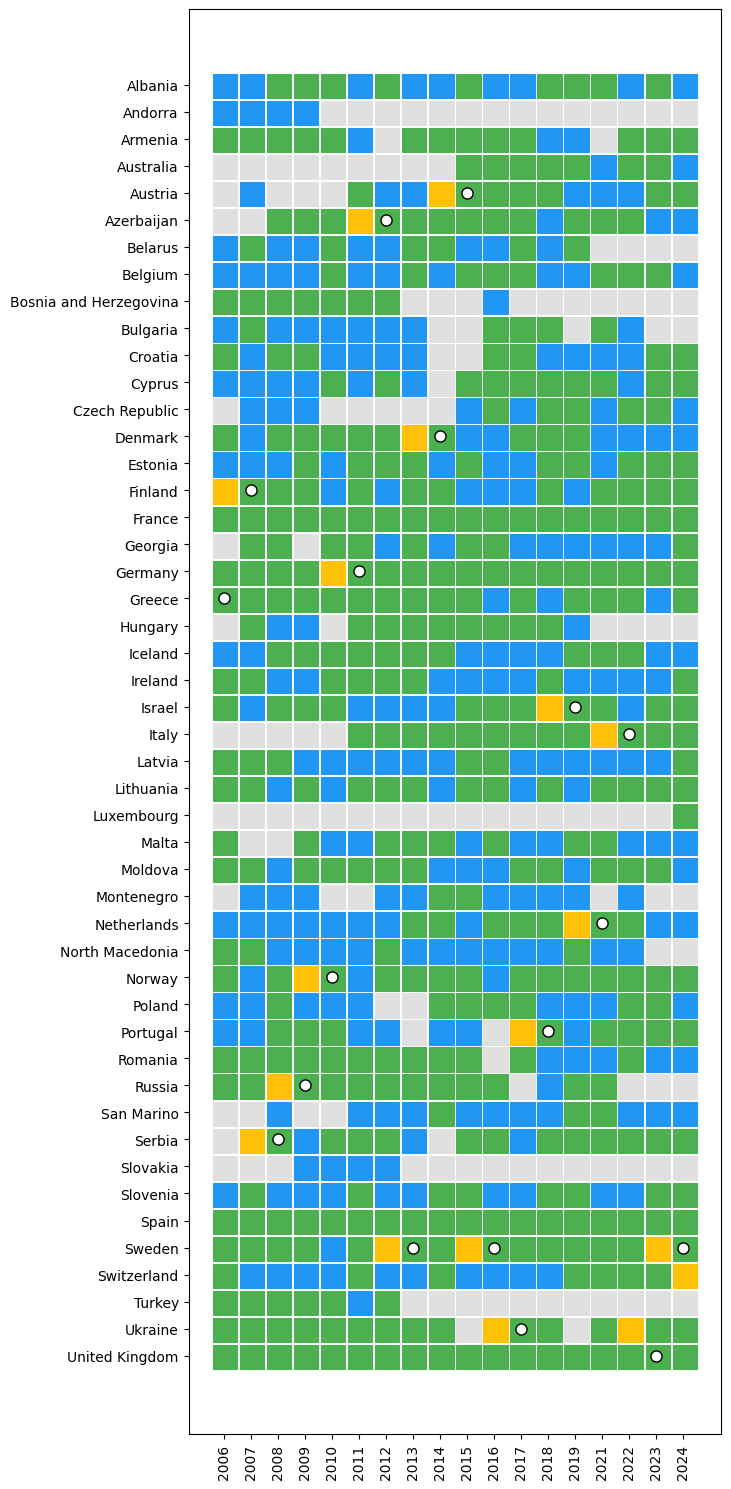

In [ ]:


heatmap_data = df_clean.pivot_table(index=['Country'], columns='Year', values='Meaning', aggfunc=lambda x: ', '.join(x) )

# Create a mapping for colors based on 'Meaning'
meaning_colors = {
    'Final': '#4CAF50',        # Green
    'Semi-Final': '#2196F3',   # Blue
    'Not present': '#E0E0E0',  # Light Grey
    'Win': '#FFC107'         # Yellow 
}


color_mapped = heatmap_data.applymap(lambda x: meaning_colors.get(x, '#FFFFFF'))

fig, ax = plt.subplots(figsize=(30, 15))


square_size = 0.9
spacing = 0.2

for i, country in enumerate(heatmap_data.index):
    for j, year in enumerate(heatmap_data.columns):
        meaning = heatmap_data.loc[country, year]
        color = meaning_colors.get(meaning, '#FFFFFF')
        ax.add_patch(plt.Rectangle(
            (j + spacing / 2, i + spacing / 2),  
            square_size, square_size, 
            color=color, edgecolor='white', linewidth=0.8
        ))
        if df_clean[(df_clean['Country'] == country) & (df_clean['Year'] == year) & (df_clean['Host'] == 1)].any().any():
            plt.plot(j + 0.5, i + 0.5, 'o', markerfacecolor='white', markeredgecolor='black', markersize=8)


ax.set_yticks([i + 0.5 for i in range(len(heatmap_data.index))])
ax.set_yticklabels(heatmap_data.index)
ax.set_xticks([j + 0.5 for j in range(len(heatmap_data.columns))])
ax.set_xticklabels(heatmap_data.columns, rotation=90)

ax.invert_yaxis()
ax.set_aspect('equal')
ax.grid(False)

plt.tight_layout()
plt.show()
